In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa 
import librosa.display

## load in csv spectrogram files

In [151]:
#create pandas df from csv files 
s_nan = pd.read_csv('spectrograms_nan.csv') #df with missing values 
sdf = pd.read_csv('spectrograms.csv') #df with no missing values
s_nan.head()

,Unnamed: 0,gbifID,type,format,URL,references,license,group,Common Name,Scientific Name,Type,id,y,sr,melspectro,melspectro_db,chroma_stft,Xdb
0,0,1572324720,Sound,audio/mpeg,http://www.tierstimmenarchiv.de/recordings/Cre...,http://www.tierstimmenarchiv.de/webinterface/c...,http://creativecommons.org/licenses/by-nc-sa/4.0/,Aves,Corn Crake,Crex crex,Not Dangerous,1.572325e+09,[ 0. 0. 0. ... -0.00...,22050.0,[[2.0839334e-04 9.2479233e-03 3.7993155e-02 .....,[[-58.00468 -41.533077 -35.396465 ... -10.800...,[[0.33644855 0.45987204 0.49630252 ... 0.32096...,[[-27.114927 -19.522707 -11.617491 ... 17....
1,1,1572324719,Sound,audio/mpeg,http://www.tierstimmenarchiv.de/recordings/Cre...,http://www.tierstimmenarchiv.de/webinterface/c...,http://creativecommons.org/licenses/by-nc-sa/4.0/,Aves,Corn Crake,Crex crex,Not Dangerous,1.572325e+09,[ 0. 0. 0. ... -0.00...,22050.0,[[8.72581097e-07 1.43732483e-04 3.59106530e-03...,[[-80. -62.721558 -48.744877 ... -23.981...,[[0.37955865 0.23792116 0.26508343 ... 1. ...,[[-44.178226 -29.47525 -23.275486 ... 8....
2,2,1572324718,Sound,audio/mpeg,http://www.tierstimmenarchiv.de/recordings/Cre...,http://www.tierstimmenarchiv.de/webinterface/c...,http://creativecommons.org/licenses/by-nc-sa/4.0/,Aves,Corn Crake,Crex crex,Not Dangerous,1.572325e+09,[ 0. 0. 0. ... -0.03...,22050.0,[[1.29440195e-05 6.72759349e-03 5.11190444e-02...,[[-65.49129 -38.33338 -29.52615 ... -14.789...,[[0.60654145 0.6226416 0.8243289 ... 0.74822...,[[-37.32677 -29.742996 -11.079779 ... -8....
3,3,1572324717,Sound,audio/mpeg,http://www.tierstimmenarchiv.de/recordings/Cre...,http://www.tierstimmenarchiv.de/webinterface/c...,http://creativecommons.org/licenses/by-nc-sa/4.0/,Aves,Corn Crake,Crex crex,Not Dangerous,1.572325e+09,[ 0. 0. 0. ... -0.00...,22050.0,[[2.8849288e-06 2.5571426e-03 1.6399221e-02 .....,[[-75.18198 -45.705772 -37.635094 ... -21.765...,[[0.8089813 0.81026065 0.9336924 ... 0.76193...,[[-40.872856 -11.780343 -6.367126 ... 3....
4,4,1572324716,Sound,audio/mpeg,http://www.tierstimmenarchiv.de/recordings/Cre...,http://www.tierstimmenarchiv.de/webinterface/c...,http://creativecommons.org/licenses/by-nc-sa/4.0/,Aves,Corn Crake,Crex crex,Not Dangerous,1.572325e+09,[ 0. 0. 0. ... 0.02...,22050.0,[[6.1422383e-05 6.1354307e-03 6.4698793e-02 .....,[[-60.861855 -40.86667 -30.63616 ... -14.957...,[[0.945572 0.72711 0.6229705 ... 0.56006...,[[-31.734558 -24.564798 -22.052708 ... 5....


## Start of EDA

In [152]:
s_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12375 entries, 0 to 12374
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       12375 non-null  int64  
 1   gbifID           12375 non-null  int64  
 2   type             12375 non-null  object 
 3   format           12375 non-null  object 
 4   URL              12375 non-null  object 
 5   references       12375 non-null  object 
 6   license          12374 non-null  object 
 7   group            12375 non-null  object 
 8   Common Name      12375 non-null  object 
 9   Scientific Name  12375 non-null  object 
 10  Type             12375 non-null  object 
 11  id               12263 non-null  float64
 12  y                12263 non-null  object 
 13  sr               12263 non-null  float64
 14  melspectro       12263 non-null  object 
 15  melspectro_db    12263 non-null  object 
 16  chroma_stft      12263 non-null  object 
 17  Xdb         

Out of 12375 animal sounds, 12263 were able to be downloaded and transformed into spectrograms. The output below shows the missing values.

In [18]:
s_nan.isnull().sum()

Unnamed: 0           0
gbifID               0
type                 0
format               0
URL                  0
references           0
license              1
group                0
Common Name          0
Scientific Name      0
Type                 0
id                 112
y                  112
sr                 112
melspectro         112
melspectro_db      112
chroma_stft        112
Xdb                112
dtype: int64

In [19]:
s_nan.nunique()

Unnamed: 0         12375
gbifID             12375
type                   1
format                 1
URL                12375
references         12375
license                2
group                  2
Common Name         1388
Scientific Name     1427
Type                   2
id                 12263
y                  10934
sr                     1
melspectro         12258
melspectro_db      12254
chroma_stft        12258
Xdb                12261
dtype: int64

In [24]:
s_nan['group'].value_counts()

Aves         11301
Carnivora     1074
Name: group, dtype: int64

In [25]:
sdf['group'].value_counts()

Aves         11204
Carnivora     1058
Name: group, dtype: int64

Dataset is not balanced between Aves and Carnivora class 

In [52]:
names = sdf.groupby(['group', 'Common Name']).size().reset_index(name='counts')
#print(names)
#plt.bar(names['Common Name'], names['counts'])

In [54]:
display(names.sort_values(by='counts', ascending=False))

,group,Common Name,counts
248,Aves,Chaffinch,707
141,Aves,Blackbird,463
768,Aves,Ortolan Bunting,377
1004,Aves,Song Thrush,302
480,Aves,Great Tit,272
...,...,...,...
692,Aves,Masked Gnatcatcher,1
694,Aves,Masked Tanager,1
695,Aves,Masked Yellowthroat,1
696,Aves,Meadow Bunting,1


array([<AxesSubplot:title={'center':'Aves'}>,
       <AxesSubplot:title={'center':'Carnivora'}>], dtype=object)

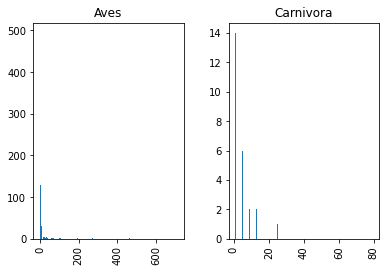

In [103]:
##add histogram, for skewed distr.
names.hist(column="counts", by="group", bins=1000)

In [120]:
##consider removing all values of "1" or <50 

names2 = names[names['counts'].between(20,80)]
display(names2)
names2['counts'].sum()
names2.groupby(['group']).sum()

#export list of common names and remove from master 

,group,Common Name,counts
45,Aves,Athene,20
73,Aves,Barred Warbler,26
90,Aves,Black Redstart,33
96,Aves,Black Woodpecker,61
169,Aves,Bluethroat,43
...,...,...,...
1312,Carnivora,Domestic Dog,79
1313,Carnivora,Eurasian Lynx,28
1327,Carnivora,Leopard,64
1353,Carnivora,Sun Bear,20


,counts
Common Name,
African Lion,70
African Wild Dog,42
Arctic Fox,48
Arctic Wolf,36
Athene,20
...,...
Willow Tit,36
Wood Sandpiper,24
Wood Warbler,53


[Text(0, 0, 'Aves'), Text(1, 0, 'Carnivora')]

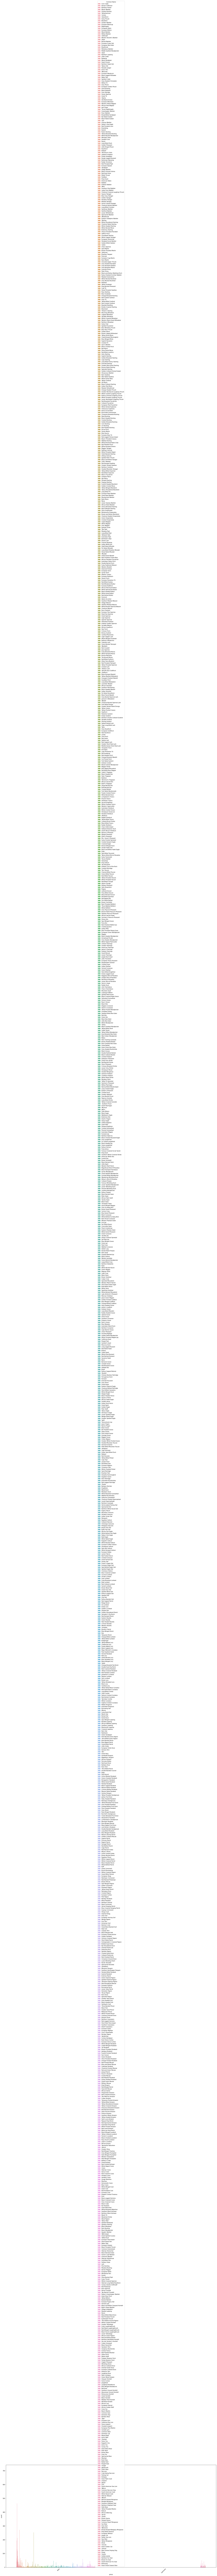

In [66]:
plt.figure(figsize=(30,15))
#ax = sns.countplot(data=sdf, x='Common Name', hue='group', orient="V")
ax = sns.countplot(data=sdf, x='group', hue='Common Name', orient="v")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [ ]:
#view spectrograms example
#img = librosa.display.specshow(sdf['Xdb, x_axis='time', y_axis='mel', sr=sr, fmax=8000)

## Spectrogram generation and use
The "y" column represents the audio files amplitude only, the actual time can be figured out by using the sample rate of 22050. Based on literature review, models don't handle this data well, so it must be converted to a spectrogram. The spectrogram plots Frequency (y-axis) vs Time(x-axis) and uses color to depict Amplitude of each frequency. The brighter color represents a higher signal energy. The standard spectrogram "stft" uses Fourier Transform method to convert audio waveform into an image. However, humans cannot hear all frequencies of this method, we hear frequencies on a logarithmic scale instead of a linear scale. The Mel Scale takes this into account, so this report uses the Mel Spectrogram which includes th Mel Scale instead of Frequency (y-axis) and Decibel scale instead of Amplitude (colors). 



## Dataset Challenges

Out of 12375 animal sounds, 12263 were able to be downloaded and transformed into spectrograms. Only ~1000 of these represent the carnivora class, so the dataset is not balanced and the carnivora class is underrepresented by the dataset. Thereofore using the data in it's unbalanced state is expected to result in bias towards the aves class. Since we are unable to collect more data due to time constraints of the project, we will need to weight different methods for balancing the dataset to achieve the most trustworthy results. The following approaches will be attempted:

1. undersampling: samples will be removed from Aves to match the length of the Carnivora Class. We expect this will lend to an overfitting problem, since the dataset will be small at approximately 2000 samples
2. oversampling: Using imputation or copying samples and augmenting them to increase the size of the Carnivora class that is underrepresented. Realistically this could also lead to overfitting. 
3. Using Dataset as is, but understanding the bias. 
4. Looking at methods other than Accuracy to gauge model performance. 

Text(0.5, 1.0, 'carnivora histogram')

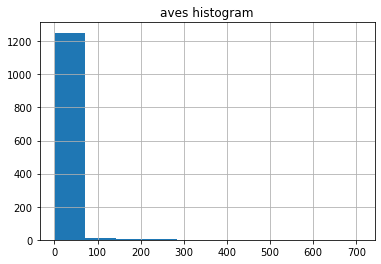

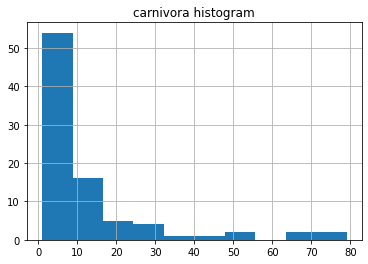

In [153]:
## Split Dataset into Aves and Carnivora
aves = sdf[sdf['group']=='Aves']
aves_grouped = aves.groupby(['Common Name']).size().reset_index(name='counts')
aves_grouped.hist()
plt.title('aves histogram')
carnivora = sdf[sdf['group']=='Carnivora']
carn_grouped = carnivora.groupby(['Common Name']).size().reset_index(name='counts')
carn_grouped.hist()
plt.title("carnivora histogram")

In [182]:
print('total creatures in aves = ',aves['Common Name'].nunique())
print('total creatures in carnivora = ',carnivora['Common Name'].nunique())

total creatures in aves =  1274
total creatures in carnivora =  87


In [183]:
aves_short = aves_grouped[aves_grouped['counts'].between(20,80)]
display(aves_short)
print('total aves with 20<x<80 sounds = ',aves_short['counts'].sum())
print('total creatures in aves_short = ',aves_short['Common Name'].nunique())


,Common Name,counts
45,Athene,20
73,Barred Warbler,26
90,Black Redstart,33
96,Black Woodpecker,61
169,Bluethroat,43
...,...,...
1222,Willow Tit,36
1229,Wood Sandpiper,24
1230,Wood Warbler,53
1232,Woodlark,49


total aves with 20<x<80 sounds =  3359
total creatures in aves_short =  87


In [184]:
carn_short = carn_grouped[carn_grouped['counts'].between(20,80)]
display(carn_short)
print('total carn with 20<x<80 sounds = ',carn_short['counts'].sum())
print('total creatures in carn_short= ',carn_short['Common Name'].nunique())

,Common Name,counts
1,African Lion,70
2,African Wild Dog,42
3,Arctic Fox,48
4,Arctic Wolf,36
16,Brown Bear,24
24,Clouded Leopard,25
29,Corsac Fox,51
30,Cougar,30
31,Coyote,20
37,Domestic Cat,30


total carn with 20<x<80 sounds =  640
total creatures in carn_short=  15


In [186]:
##randomly sample species list, to get a subset of aves
aves_short_sampled = aves_short.sample(16)
aves_short_sampled.groupby(['Common Name']).size().reset_index(name='counts')

,Common Name,counts
0,Buteos,1
1,Corn Crake,1
2,Crested Lark,1
3,Dunnock,1
4,Eurasian Coot,1
5,Eurasian Siskin,1
6,Eurasian Treecreeper,1
7,Great Crested Grebe,1
8,Greenfinch,1
9,Icterine Warbler,1


In [188]:
#get only the rows associated with the dataframes within the range specified (above is 20<x<80)
aves_df = aves[aves['Common Name'].isin(aves_short_sampled['Common Name'])]
carn_df = carnivora[carnivora['Common Name'].isin(carn_short['Common Name'])]

In [190]:
confirm_aves = aves_df.groupby(['Common Name']).size().reset_index(name='counts')
print('total aves samples remaining = ',confirm_aves['counts'].sum())
print('total aves species remaining = ',confirm_aves['Common Name'].nunique())

total aves samples remaining =  668
total aves species remaining =  16


### Undersampling Method 

Use 'aves_df' and 'carn_df' for undersampling method. Need to recombine and then split into train/test before modeling. 80/20 maybe since low data. 

In [195]:
#balanced data and all species have 20-80 sounds/rows each. 
print('aves sounds total = ', len(aves_df))
print('carnivora sounds total = ',len(carn_df))

aves sounds total =  668
carnivora sounds total =  640


## Modeling 

Use melspectro_db column preferrably

<br> Next Steps 

<br>one class SVM with dataset Aves - Meli
<br>use all carnivora and sample of same size of the Aves = Classification (Random Forest, Ada Boosting) - Meli 
<br> GMM - Katy
<br> Lasso(use code from class or packages). -Katy 